In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv('../data_seismCA_28oct2023/data_obspy_iris_AllCalBox_1960_to_2023oct29_20231029a.csv')

In [4]:
df['datetime'] =  pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime')
df = df.reset_index(drop=True)

In [5]:
print(df.shape)
display(df.head())
display(df.tail())

(562542, 6)


,datetime,lat,lon,depth,mag,type
0,1960-01-20 03:25:49,36.56,-121.71,0.0,5.0,NaN
1,1960-02-27 19:22:25,37.93,-122.02,NaN,3.4,NaN
2,1960-03-16 08:21:38,34.37,-118.93,NaN,3.2,NaN
3,1960-03-22 18:31:33,37.73,-122.13,NaN,2.6,NaN
4,1960-03-29 04:02:00,38.30,-119.30,NaN,4.0,NaN


,datetime,lat,lon,depth,mag,type
562537,2023-10-29 07:56:55.110,34.038333,-117.306000,23340.0,0.99,Ml
562538,2023-10-29 08:46:21.520,38.833668,-122.815834,1210.0,1.52,Md
562539,2023-10-29 09:01:19.990,38.687832,-122.501663,2420.0,1.69,Md
562540,2023-10-29 09:14:05.360,38.789665,-122.759499,330.0,1.36,Md
562541,2023-10-29 09:38:22.500,33.666833,-116.747333,12290.0,0.89,Ml


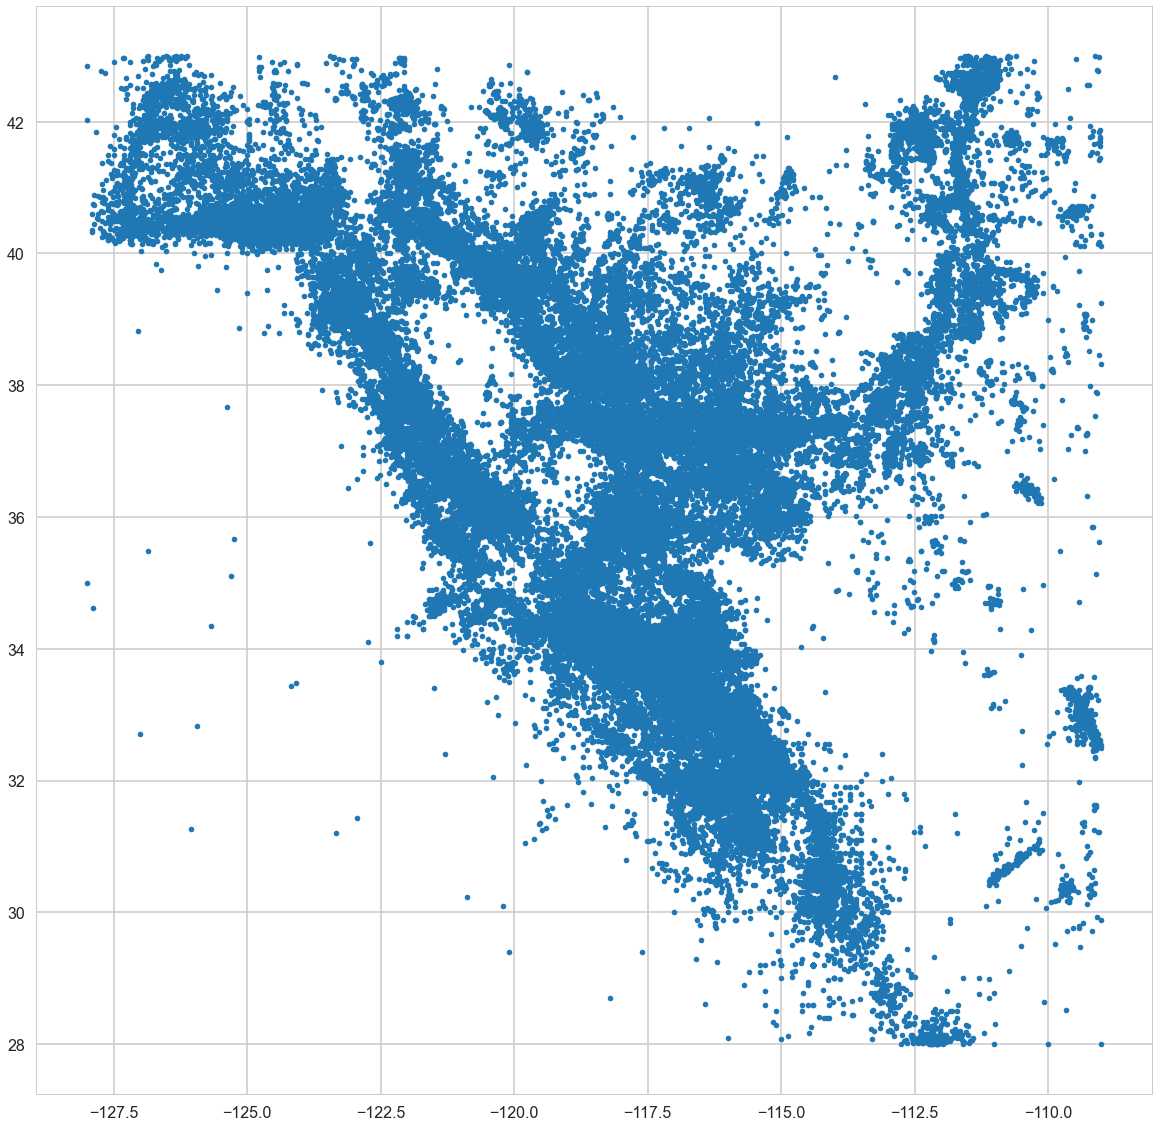

In [6]:
plt.figure(figsize=(20,20))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

#plt.scatter(df['lon'], df['lat'])
plt.plot(df['lon'], df['lat'], '.')

In [7]:
# https://www.section.io/engineering-education/dbscan-clustering-in-python/

In [8]:
# df_sel = df[df['datetime'] > pd.to_datetime('2021-01-01')] # filter on date
# df_sel = df[df['mag'] > 3.0]
df_sel = df[df['datetime'] > pd.to_datetime('2023-01-01')]
df_sel = df_sel.reset_index(drop=True)
print(df.shape, df_sel.shape)

(562542, 6) (34360, 6)


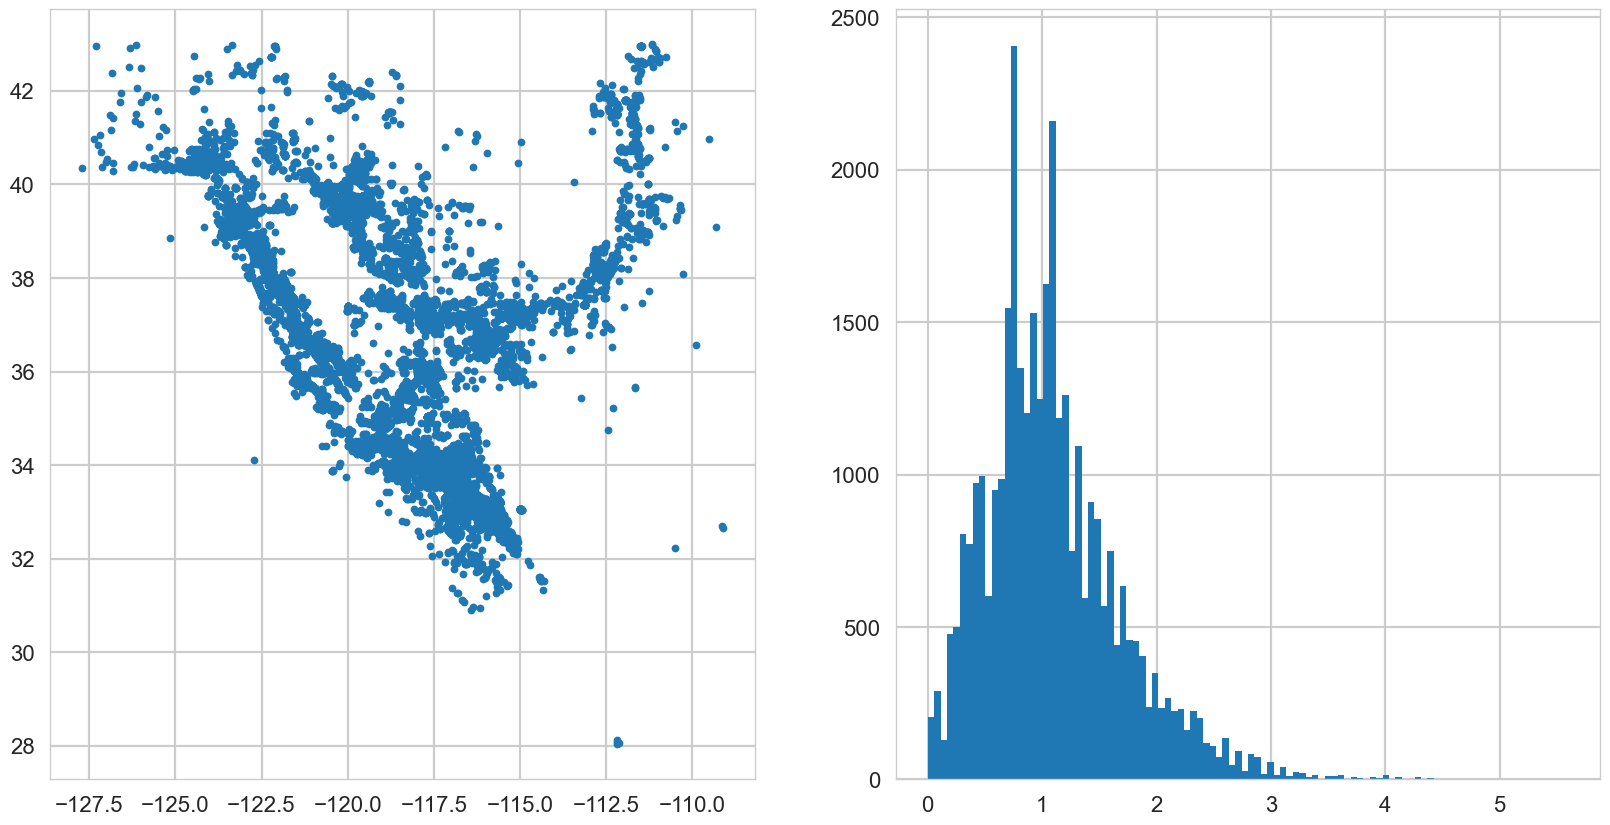

In [14]:
plt.figure(figsize=(20,10))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

plt.subplot(1,2,1)
#plt.scatter(df['lon'], df['lat'])
plt.plot(df_sel['lon'], df_sel['lat'], '.');

plt.subplot(1,2,2)
plt.hist(df_sel['mag'], bins=100);

In [15]:
display(df_sel.head(4))
display(df_sel.tail(4))

,datetime,lat,lon,depth,mag,type
0,2023-01-01 00:06:14.840,38.783667,-122.753667,1620.0,0.09,Md
1,2023-01-01 00:07:05.430,38.783500,-122.754500,1690.0,0.69,Md
2,2023-01-01 00:32:11.540,33.095500,-117.381833,25850.0,1.34,Ml
3,2023-01-01 00:32:22.630,33.408000,-116.616833,7520.0,0.84,Ml


,datetime,lat,lon,depth,mag,type
34356,2023-10-29 08:46:21.520,38.833668,-122.815834,1210.0,1.52,Md
34357,2023-10-29 09:01:19.990,38.687832,-122.501663,2420.0,1.69,Md
34358,2023-10-29 09:14:05.360,38.789665,-122.759499,330.0,1.36,Md
34359,2023-10-29 09:38:22.500,33.666833,-116.747333,12290.0,0.89,Ml


In [17]:
# x = df.loc[:, ['lon', 'lat']].values # memory error !

x0 = df_sel.loc[:, ['lon', 'lat']].values
print(x0.shape)

(34360, 2)


In [18]:
x = StandardScaler().fit_transform(x0)

In [19]:
x0

array([[-122.753667,   38.783667],
       [-122.7545  ,   38.7835  ],
       [-117.381833,   33.0955  ],
       ...,
       [-122.501663,   38.687832],
       [-122.759499,   38.789665],
       [-116.747333,   33.666833]])

In [20]:
x

array([[-0.99009382,  0.74710332],
       [-0.99037383,  0.74703386],
       [ 0.81565894, -1.6187527 ],
       ...,
       [-0.90538217,  0.70724306],
       [-0.99205426,  0.74959805],
       [ 1.02894738, -1.3811205 ]])

In [21]:
print(df.shape)
print(x.shape)
type(x)

(562542, 6)
(34360, 2)


numpy.ndarray

### DBSCAN

In [22]:
# from sklearn.cluster import DBSCAN

In [43]:
# clustering = DBSCAN(eps=3, min_samples=10).fit(df['lon'], df['lat'])
# clustering = DBSCAN(eps=3, min_samples=10).fit(x)
#  clustering = DBSCAN(eps=30, min_samples=10).fit(x)
#  clustering = DBSCAN(eps=300, min_samples=10).fit(x)
# clustering = DBSCAN(eps=0.3, min_samples=3).fit(x)
clustering = DBSCAN(eps=0.05, min_samples=3).fit(x)

In [44]:
labels = clustering.labels_

In [45]:
labels.shape

(34360,)

In [46]:
df_labels = pd.DataFrame({'Labels': labels})

In [47]:
df_labels['Labels'].value_counts()

0      15418
1      11120
4       2000
11      1648
2        689
       ...  
65         3
99         3
107        3
131        3
116        3
Name: Labels, Length: 135, dtype: int64